<div style='float: right'><img src='pic/chokona.png'/></div>

## <div id='chokona' />チョコナ

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars
data = """\
3.3...
.1....
22.21.
......
....3.
.2....""".splitlines()
area = """\
001111
022222
345677
345677
355899
3aa889""".splitlines()

### 問題
- 国(太線で区切られた部分)の数は、国内の黒マスの合計とする。国の数がない場合はいくつでもよい。
- 黒マスの連なりは、長方形とする。

### 変数
* v：各マスが黒か  (1)

### 制約
* 数字が国の黒数と等しい  (2)
* 任意の2x2で黒数が3でない  (3)

In [2]:
ni, nj = len(data), len(data[0])
a = pd.DataFrame([(i,j,data[i][j],area[i][j]) for i in range(ni)
    for j in range(nj)], columns=list('行列字国'))
a.字 = a.字.apply(lambda c: int(c) if c.isdigit() else 0)
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,字,国,Var
0,0,0,3,0,v000001
1,0,1,0,0,v000002


In [3]:
m = LpProblem()
for g,v in a.groupby('国'):
    if v.字.sum():
        m += lpSum(v.Var) == v.字.sum()
for i in range(ni-1):
    for j in range(nj-1):
        v = a.query(f'{i}<=行<={i+1}&{j}<=列<={j+1}').Var
        for x in v:
            m += lpSum(v) <= 2+2*x
m.solve()

1

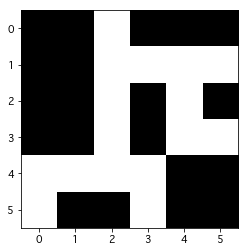

In [4]:
a['Val'] = a.Var.apply(value)
plt.imshow((a.Val<0.5).values.reshape(ni,nj), cmap='gray', interpolation='none');